In [1]:
import pandas as pd

file_path = r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv'
df = pd.read_csv(file_path, encoding='latin1') 

print(df.head())  
print(df.columns)  
print(df.dtypes)  
print(df.describe())  
print(df.isnull().sum())  

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

print("Missing values:")
print(df.isnull().sum())

df['category'].fillna('Unknown', inplace=True)

df['created_date'] = pd.to_datetime(df['created_date'])

df.drop(columns=['Abbreviation'], inplace=True)

Missing values:
rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                

In [4]:
#  1.  What are the top 10 YouTube channels based on the number of subscribers?

import pandas as pd

df = pd.read_csv('C:/Users/HP/Desktop/Finlatics/DsResearch/Media and Technology/Media and Technology/Global YouTube Statistics.csv', encoding='latin-1')

top_10_subscribers = df.sort_values(by='subscribers', ascending=False).head(10)

print(top_10_subscribers[['Youtuber', 'subscribers']])

                     Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [5]:
#  2.	Which category has the highest average number of subscribers?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

average_subscribers_by_category = df.groupby('category')['subscribers'].mean()

category_highest_average_subscribers = average_subscribers_by_category.idxmax()

print("Category with the highest average number of subscribers:", category_highest_average_subscribers)

Category with the highest average number of subscribers: Shows


In [6]:
#  3.	How many videos, on average, are uploaded by YouTube channels in each category?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

average_uploads_per_category = df.groupby('category')['uploads'].mean()

print("Average number of uploads by YouTube channels in each category:")
print(average_uploads_per_category)

Average number of uploads by YouTube channels in each category:
category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [7]:
#  4.	What are the top 5 countries with the highest number of YouTube channels?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

channel_count_by_country = df['Country'].value_counts()

top_5_countries = channel_count_by_country.head(5)

print(top_5_countries)

Country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: count, dtype: int64


In [8]:
#  5.	What is the distribution of channel types across different categories?

import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Create a cross-tabulation of channel types and categories
cross_tab = pd.crosstab(df['channel_type'], df['category'])

print("Distribution of channel types across different categories:")
print(cross_tab)

Distribution of channel types across different categories:
category       Autos & Vehicles  Comedy  Education  Entertainment  \
channel_type                                                        
Animals                       0       0          0              0   
Autos                         2       0          0              1   
Comedy                        0      39          0              5   
Education                     0       0         36              2   
Entertainment                 1      20          3            168   
Film                          0       1          2              6   
Games                         0       3          2             11   
Howto                         0       0          0              0   
Music                         0       0          0             22   
News                          0       0          0              3   
Nonprofit                     0       0          0              0   
People                        0       5     

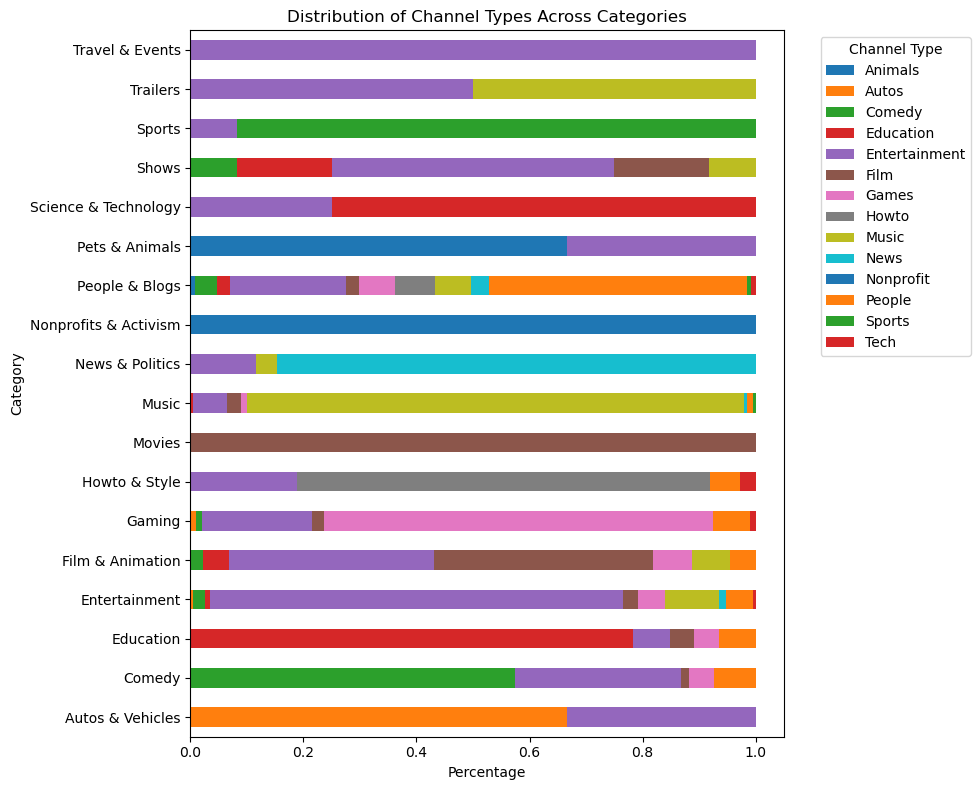

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

pivot_table = pd.pivot_table(df, index='category', columns='channel_type', aggfunc='size', fill_value=0)

pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot the distribution
pivot_table.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Percentage')
plt.ylabel('Category')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

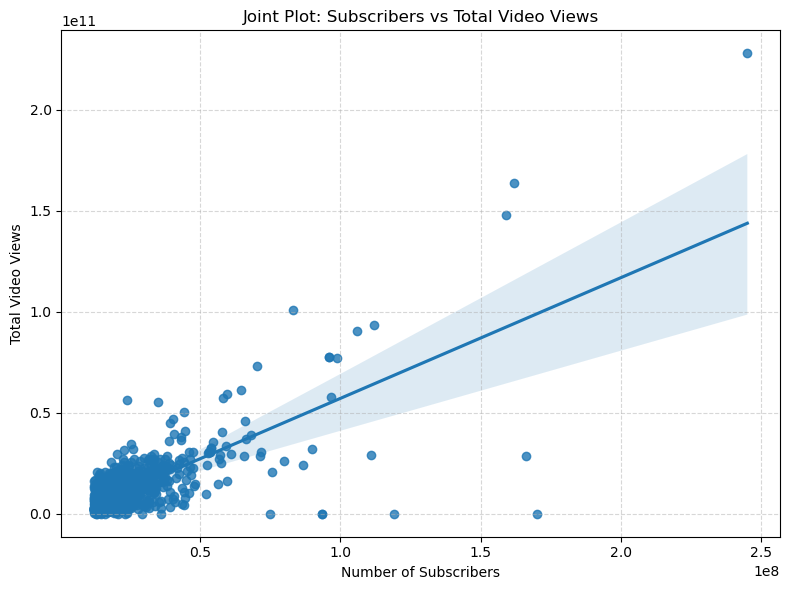

There is a positive correlation between the number of subscribers and total video views.
Correlation coefficient: 0.7481786016237688


In [2]:
#  6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

plt.figure(figsize=(8, 6))
sns.regplot(x='subscribers', y='video views', data=df)
plt.title('Joint Plot: Subscribers vs Total Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Total Video Views')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = df['subscribers'].corr(df['video views'])
if correlation > 0:
    print("There is a positive correlation between the number of subscribers and total video views.")
elif correlation < 0:
    print("There is a negative correlation between the number of subscribers and total video views.")
else:
    print("There is no correlation between the number of subscribers and total video views.")

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

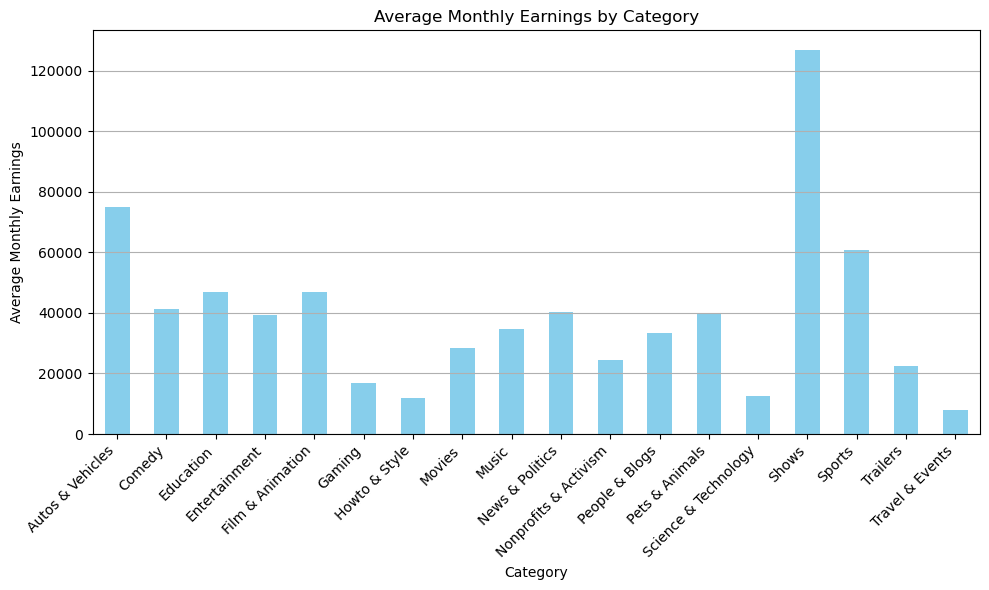

In [3]:
#  7.	How do the monthly earnings vary throughout different categories?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Group data by category and calculate mean monthly earnings
category_monthly_earnings = df.groupby('category')['lowest_monthly_earnings'].mean()

plt.figure(figsize=(10, 6))
category_monthly_earnings.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


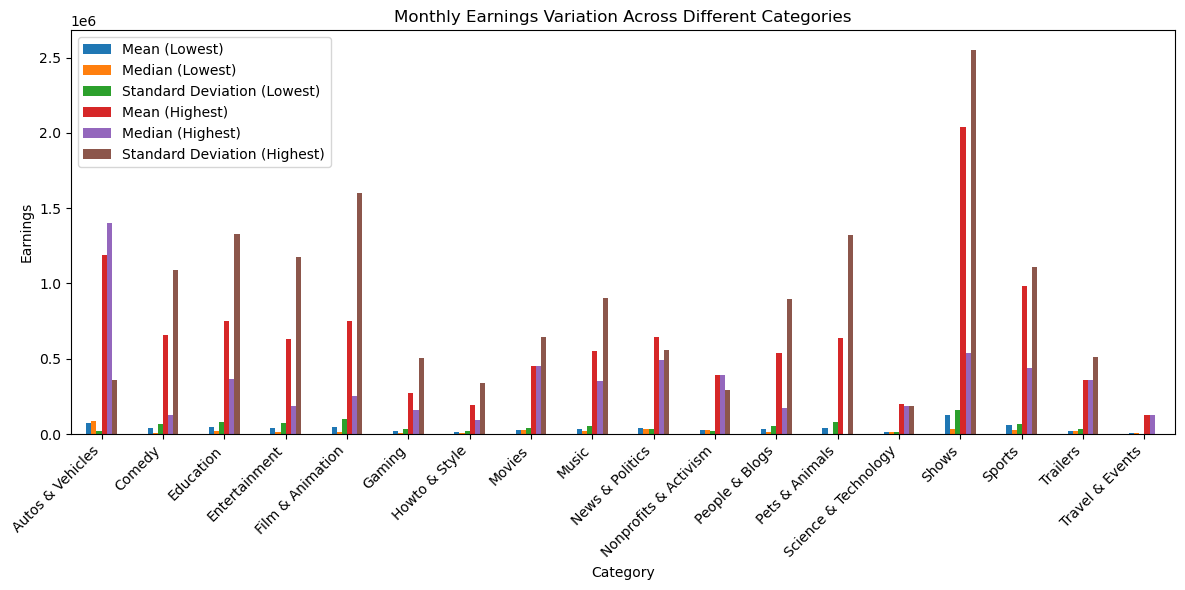

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Group the data by category and calculate descriptive statistics for monthly earnings
earnings_stats_by_category = df.groupby('category').agg({'lowest_monthly_earnings': ['mean', 'median', 'std'],
                                                        'highest_monthly_earnings': ['mean', 'median', 'std']})

# Plot the variation in monthly earnings
earnings_stats_by_category.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Earnings Variation Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Earnings')
plt.legend(['Mean (Lowest)', 'Median (Lowest)', 'Standard Deviation (Lowest)', 
            'Mean (Highest)', 'Median (Highest)', 'Standard Deviation (Highest)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

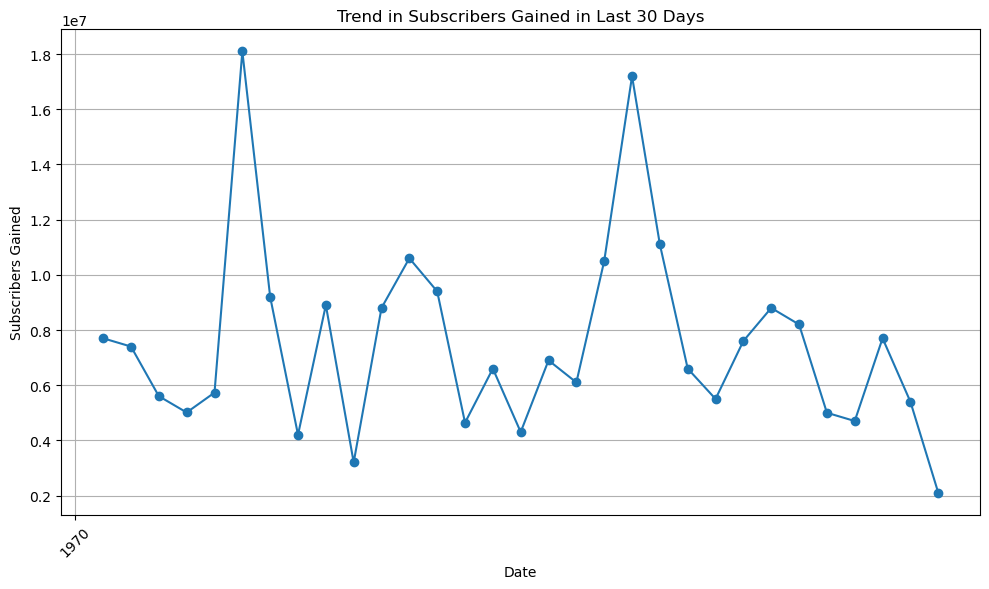

Total Subscribers Gained in Last 30 Days: 232794874.0


In [5]:
#  8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Convert 'created_date' column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

# Filter data for the last 30 days
last_30_days = df[df['created_date'] >= df['created_date'].max() - pd.Timedelta(days=30)]

# Group by date and sum the subscribers gained
subscribers_last_30_days = last_30_days.groupby('created_date')['subscribers_for_last_30_days'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(subscribers_last_30_days.index, subscribers_last_30_days.values, marker='o', linestyle='-')
plt.title('Trend in Subscribers Gained in Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Subscribers Gained')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate total subscribers gained in last 30 days
total_subscribers_last_30_days = subscribers_last_30_days.sum()
print("Total Subscribers Gained in Last 30 Days:", total_subscribers_last_30_days)


In [6]:
#  9.	Are there any outliers in terms of yearly earnings from YouTube channels?

import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Calculate Z-score for yearly earnings
z_scores = (df['lowest_yearly_earnings'] - df['lowest_yearly_earnings'].mean()) / df['lowest_yearly_earnings'].std()

threshold = 3

# Identify outliers
outliers = df[abs(z_scores) > threshold]

# Display outliers
print("Outliers in terms of yearly earnings:")
print(outliers)

Outliers in terms of yearly earnings:
     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series  245000000.0  2.280000e+11   
2       3                     MrBeast  166000000.0  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4       5                   SET India  159000000.0  1.480000e+11   
15     16                    Sony SAB   83000000.0  1.010000e+11   
21     22                      Zee TV   70500000.0  7.313905e+10   
26     27                   Colors TV   64600000.0  6.151091e+10   
56     57                 HAR PAL GEO   44600000.0  4.113905e+10   
65     66              ARY Digital HD   43200000.0  3.793978e+10   
83     84                 GR6 EXPLODE   38900000.0  2.515423e+10   
132   133               BETER Bï¿½ï¿½   32700000.0  1.918004e+10   
139   140                    StarPlus   32000000.0  2.680067e+10   
211   212            Alan Chikin Chow   26400000.0  2.700653e+10   
212   213 

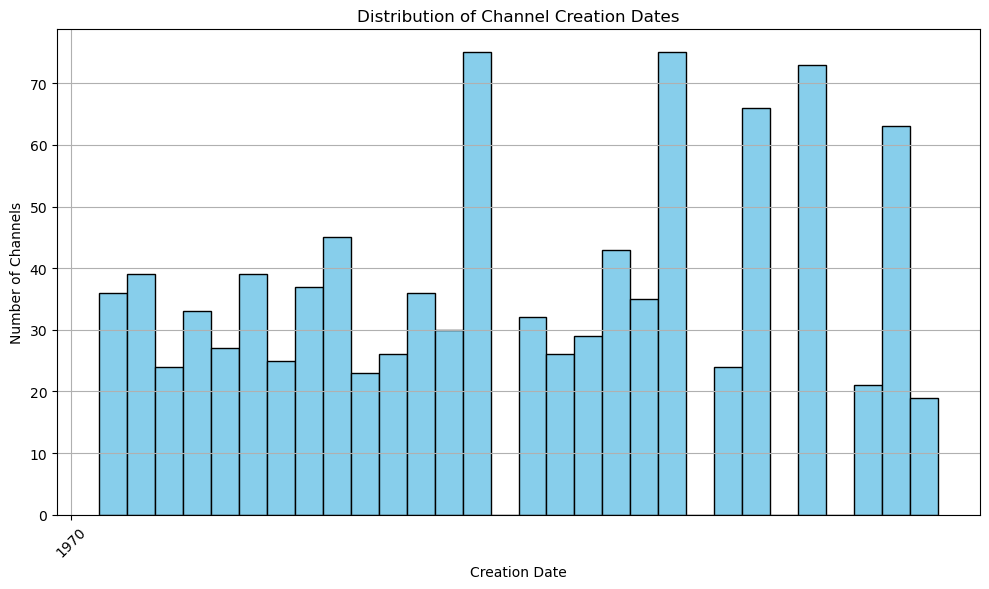

In [1]:
# 10.	What is the distribution of channel creation dates? Is there any trend over time?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Convert 'created_date' column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

# Create a histogram of channel creation dates
plt.figure(figsize=(10, 6))
plt.hist(df['created_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Creation Date')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


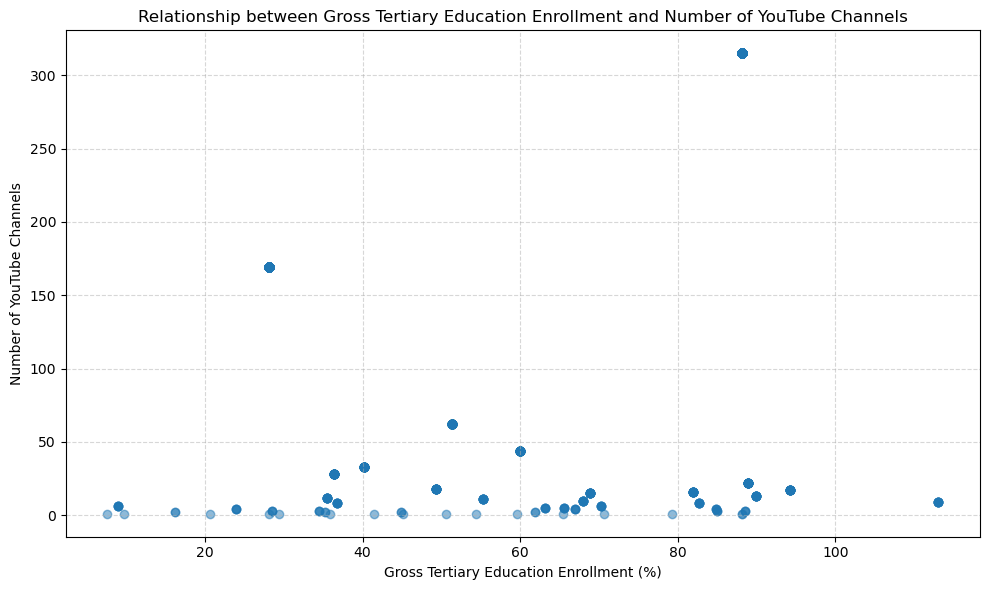

In [2]:
#  11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Group by country and calculate the count of YouTube channels in each country
channel_counts = df['Country'].value_counts().reset_index()
channel_counts.columns = ['Country', 'Channel Count']

# Merge channel_counts with df on 'Country' column
merged_df = pd.merge(df, channel_counts, on='Country')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Gross tertiary education enrollment (%)'], merged_df['Channel Count'], alpha=0.5)
plt.title('Relationship between Gross Tertiary Education Enrollment and Number of YouTube Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

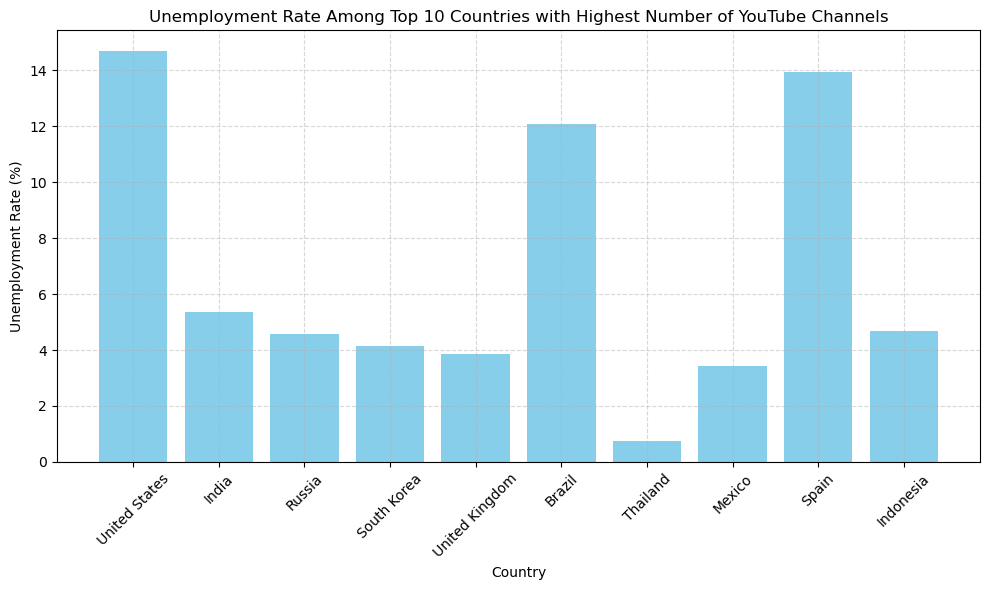

In [3]:
#  12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

top_10_countries = df['Country'].value_counts().head(10).index

# unemployment rate for each of these countries
unemployment_rates = df[df['Country'].isin(top_10_countries)][['Country', 'Unemployment rate']].drop_duplicates()

plt.figure(figsize=(10, 6))
plt.bar(unemployment_rates['Country'], unemployment_rates['Unemployment rate'], color='skyblue')
plt.title('Unemployment Rate Among Top 10 Countries with Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [4]:
# 13.	What is the average urban population percentage in countries with YouTube channels?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# countries with YouTube channels
countries_with_channels = df['Country'].unique()

# average urban population percentage
average_urban_population = df[df['Country'].isin(countries_with_channels)]['Urban_population'].mean()

print("Average urban population percentage in countries with YouTube channels:", average_urban_population)

Average urban population percentage in countries with YouTube channels: 223974718.82045454


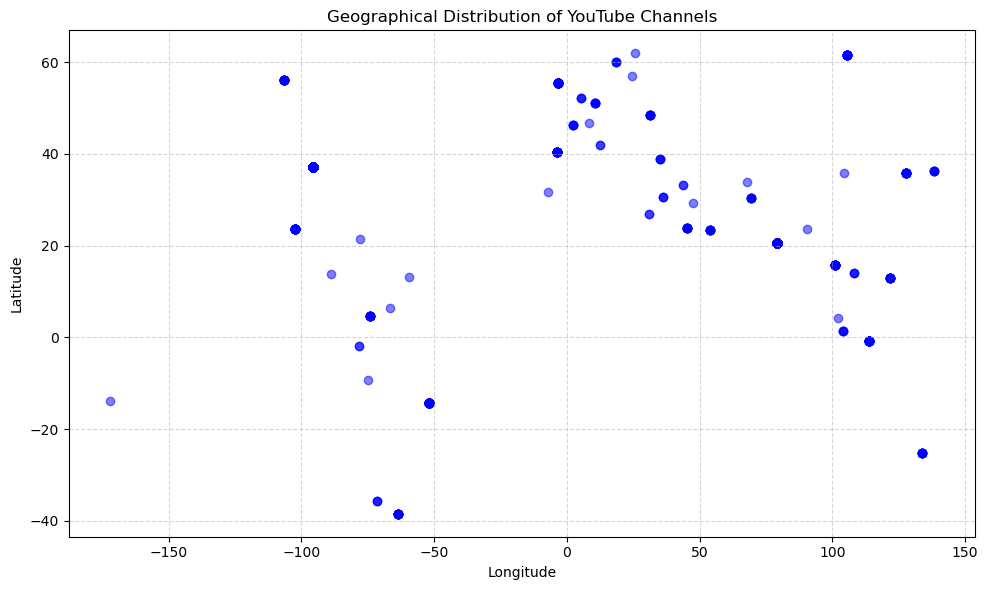

In [5]:
# 14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], color='blue', alpha=0.5)
plt.title('Geographical Distribution of YouTube Channels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# 15.	What is the correlation between the number of subscribers and the population of a country?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# correlation coefficient
correlation = df['subscribers'].corr(df['Population'])

print("Correlation between number of subscribers and population:", correlation)

Correlation between number of subscribers and population: 0.08279259673577878


In [7]:
# 16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# top 10 countries with the highest number of YouTube channels
top_10_countries = df['Country'].value_counts().head(10).index

# total population of each country
total_population = df.groupby('Country')['Population'].max()

# total population for the top 10 countries
top_10_population = total_population[top_10_countries]

print("Total Population of Top 10 Countries with Highest Number of YouTube Channels:")
print(top_10_population)

Total Population of Top 10 Countries with Highest Number of YouTube Channels:
Country
United States     3.282395e+08
India             1.366418e+09
Brazil            2.125594e+08
United Kingdom    6.683440e+07
Mexico            1.260140e+08
Indonesia         2.702039e+08
Spain             4.707678e+07
Thailand          6.962558e+07
South Korea       5.170910e+07
Russia            1.443735e+08
Name: Population, dtype: float64


In [8]:
#  17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

import pandas as pd

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# correlation coefficient
correlation = df['subscribers_for_last_30_days'].corr(df['Unemployment rate'])

print("Correlation between number of subscribers gained in the last 30 days and unemployment rate:", correlation)

Correlation between number of subscribers gained in the last 30 days and unemployment rate: -0.022031381943234365


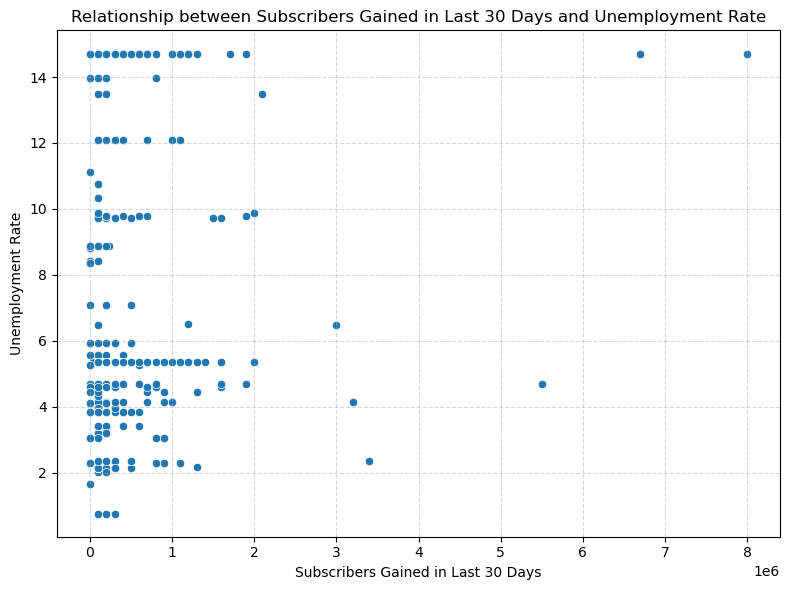

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# Plot the relationship between subscribers gained in the last 30 days and unemployment rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers_for_last_30_days', y='Unemployment rate', data=df)
plt.title('Relationship between Subscribers Gained in Last 30 Days and Unemployment Rate')
plt.xlabel('Subscribers Gained in Last 30 Days')
plt.ylabel('Unemployment Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

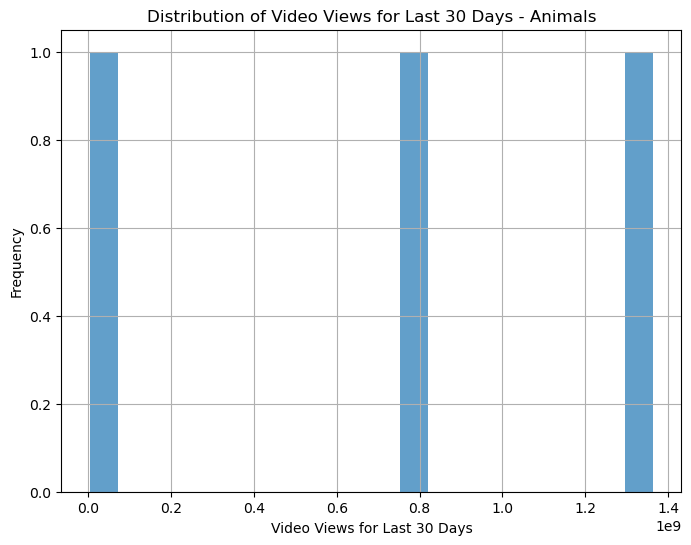

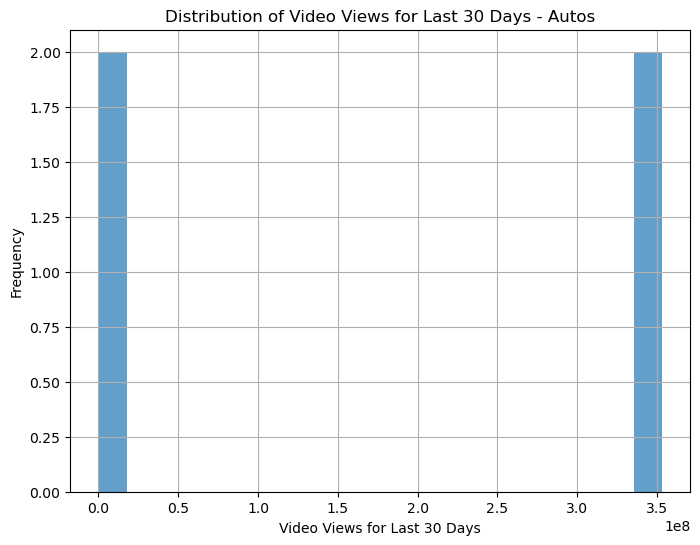

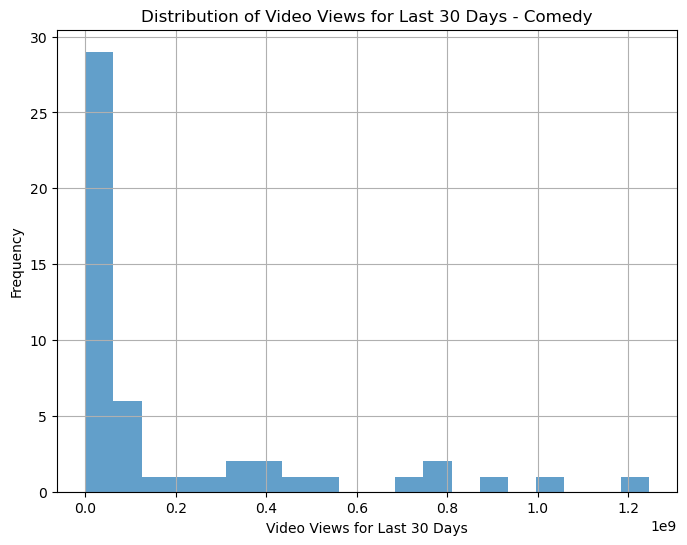

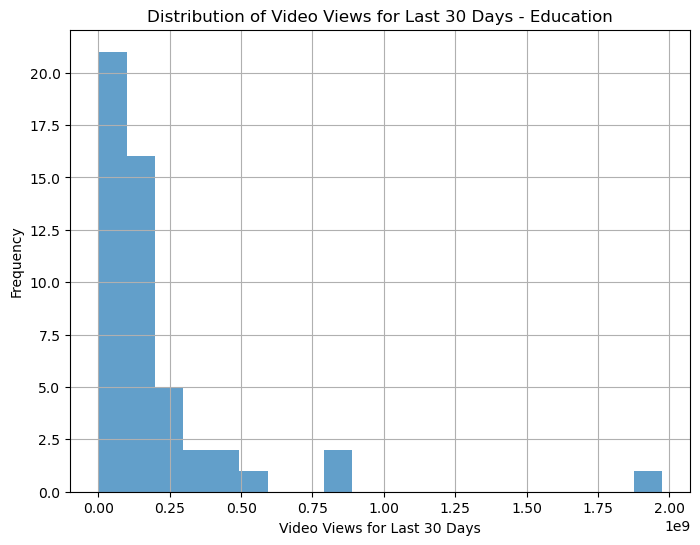

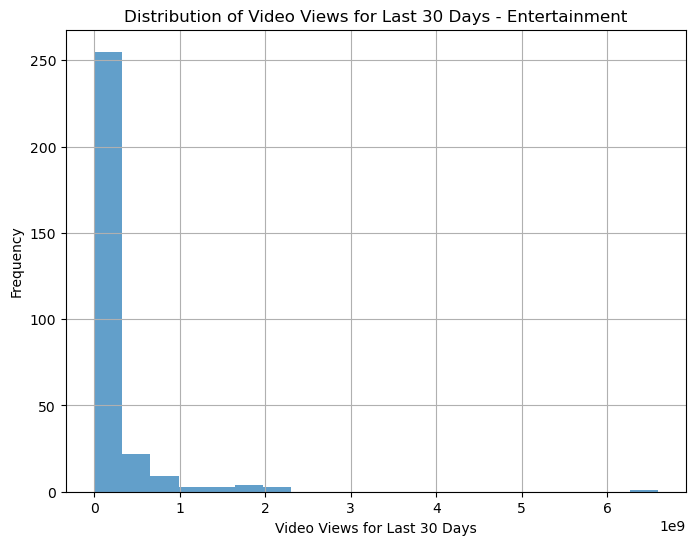

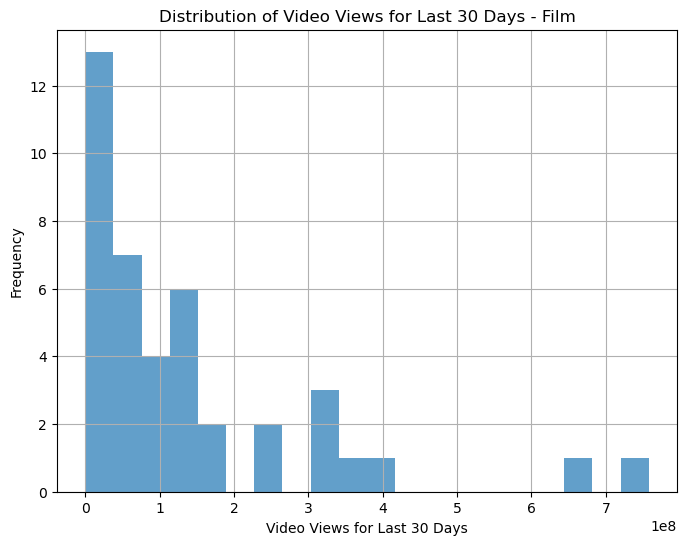

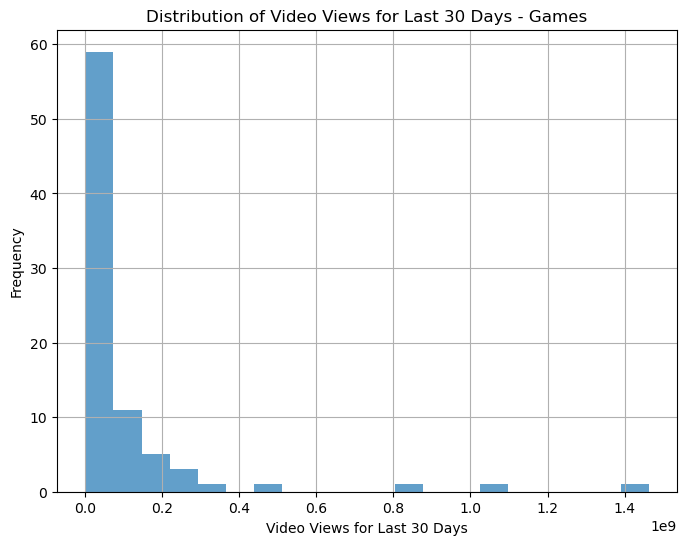

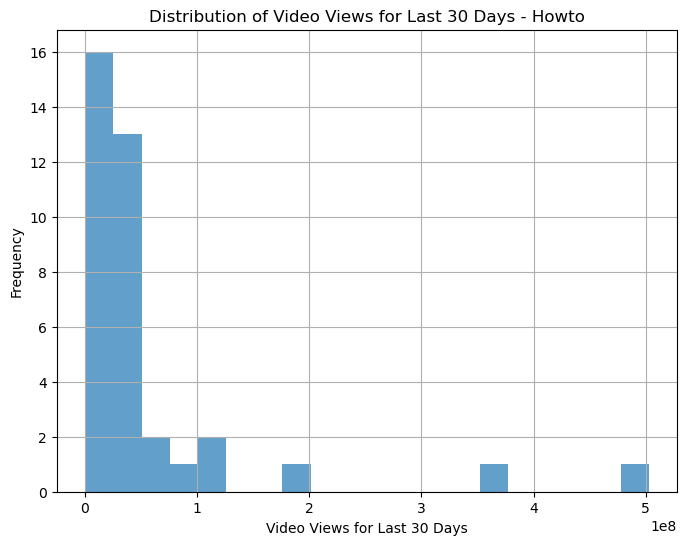

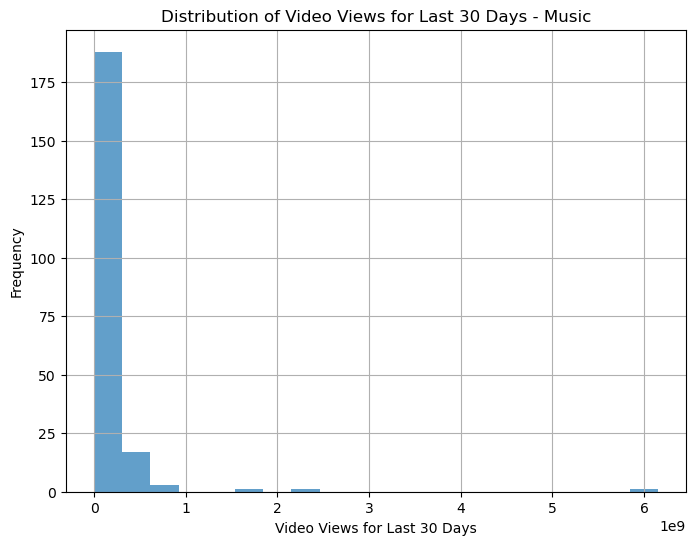

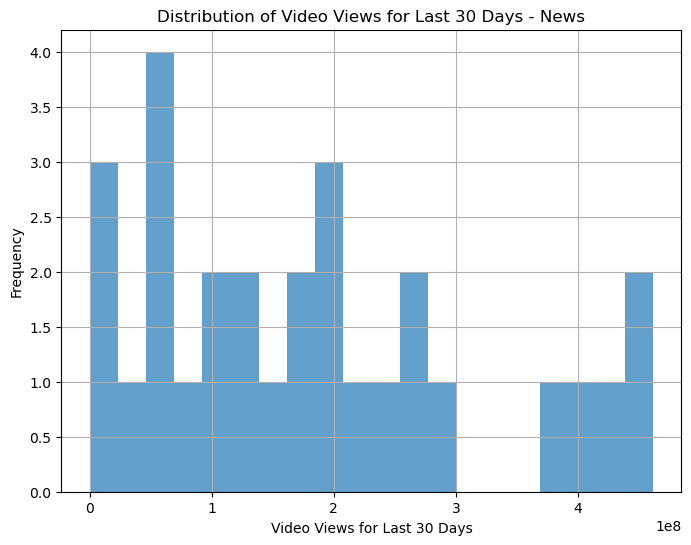

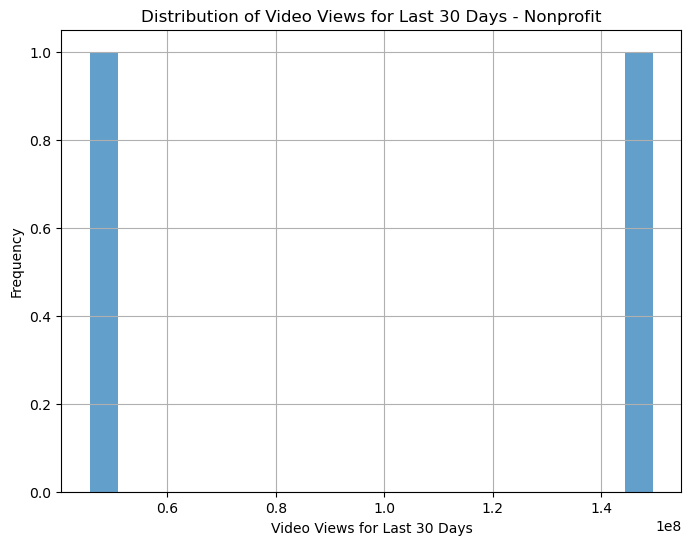

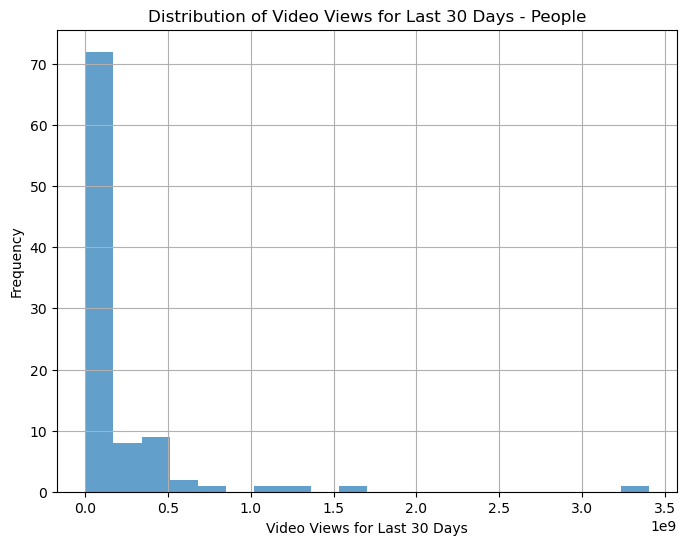

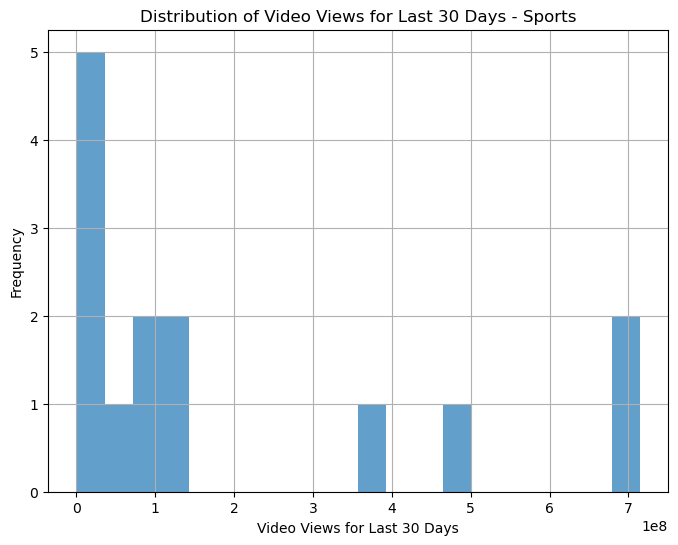

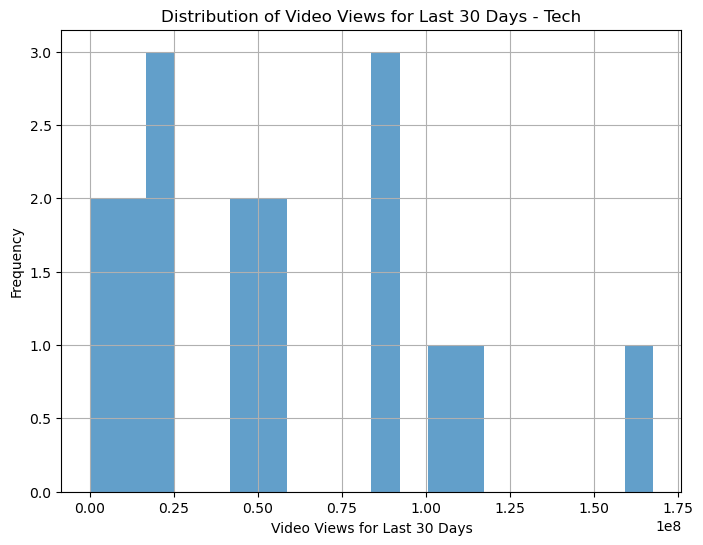

In [10]:
#  18.	How does the distribution of video views for the last 30 days vary across different channel types?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\HP\Desktop\Finlatics\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv', encoding='latin-1')

# irrelevant columns
df = df.drop(['rank', 'Title', 'Abbreviation', 'country_rank', 'channel_type_rank', 'subscribers_for_last_30_days',
                        'created_year', 'created_month', 'created_date', 'Gross tertiary education enrollment (%)',
                        'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], axis=1)

df.isnull().sum()

grouped_by_channel_type = df.groupby('channel_type')

for channel_type, group in grouped_by_channel_type:
    plt.figure(figsize=(8, 6))
    plt.hist(group['video_views_for_the_last_30_days'], bins=20, alpha=0.7)
    plt.title(f'Distribution of Video Views for Last 30 Days - {channel_type}')
    plt.xlabel('Video Views for Last 30 Days')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()